In [4]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [6]:
df = pd.read_csv("Churn_Modelling.csv")

In [7]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [9]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [13]:
df["Geography"].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [14]:
df["Gender"].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [10]:
df.drop(["RowNumber", "CustomerId", "Surname"],axis = 1,inplace = True )


In [16]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
# converting categorial data into numerical data using hot encoding
df = pd.get_dummies(df,columns = ["Geography","Gender"],drop_first =True)


In [12]:
X = df.drop("Exited",axis = 1)
y = df['Exited']
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [24]:
y


0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 7)

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
X_train_scaled

array([[-0.22482832,  0.09984529,  1.37778936, ..., -0.57581067,
        -0.57600312,  0.91578261],
       [-0.8357854 , -0.84857831, -1.03726649, ..., -0.57581067,
        -0.57600312,  0.91578261],
       [-0.98075826,  0.66889946, -0.69225851, ..., -0.57581067,
         1.73610172,  0.91578261],
       ...,
       [ 0.34470794, -0.37436651,  0.34276543, ..., -0.57581067,
        -0.57600312,  0.91578261],
       [ 0.36541835, -0.46920887,  1.37778936, ..., -0.57581067,
         1.73610172,  0.91578261],
       [ 0.76927133, -1.22794775,  0.34276543, ..., -0.57581067,
        -0.57600312,  0.91578261]])

In [32]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [48]:
# Creating a sequential model object
model = Sequential()
# add function add a layer to our model, dense is a our layer

model.add(Dense(10, activation="relu",input_dim = 11)) #here 10 represents the number of nodes in this layer
model.add(Dense(10, activation="relu"))#second hidden layer
model.add(Dense(1, activation="sigmoid",)) #creating a output layer
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 10)                120       
                                                                 
 dense_15 (Dense)            (None, 10)                110       
                                                                 
 dense_16 (Dense)            (None, 1)                 11        
                                                                 
Total params: 241
Trainable params: 241
Non-trainable params: 0
_________________________________________________________________


In [49]:
# Now we have to compile the model
model.compile(loss = "binary_crossentropy", optimizer = "Adam",metrics = ["accuracy"])

In [54]:
# using history to plot the graph.
# graph provides lots of information

history = model.fit(X_train_scaled,y_train,epochs = 100,validation_split = 0.2)
# If training accuracy is increasing but validation accuracy isnot then it is the case of overfitting

Epoch 1/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3206 - accuracy: 0.8662 - val_loss: 0.3532 - val_accuracy: 0.8562
Epoch 2/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3203 - accuracy: 0.8700 - val_loss: 0.3519 - val_accuracy: 0.8506
Epoch 3/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3198 - accuracy: 0.8698 - val_loss: 0.3536 - val_accuracy: 0.8562
Epoch 4/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3199 - accuracy: 0.8686 - val_loss: 0.3531 - val_accuracy: 0.8525
Epoch 5/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3196 - accuracy: 0.8687 - val_loss: 0.3526 - val_accuracy: 0.8550
Epoch 6/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3196 - accuracy: 0.8695 - val_loss: 0.3572 - val_accuracy: 0.8506
Epoch 7/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3199 - accuracy: 0.8684 - val_loss: 0.3553 - val_accuracy: 0.8519

In [55]:
import matplotlib.pyplot as plt

In [57]:
history.history

{'loss': [0.3205658197402954,
  0.32028841972351074,
  0.3198133707046509,
  0.3198895752429962,
  0.3195866048336029,
  0.3195856511592865,
  0.319881796836853,
  0.3195611834526062,
  0.3195970058441162,
  0.3195335268974304,
  0.31917616724967957,
  0.3190590441226959,
  0.31906241178512573,
  0.31861600279808044,
  0.31881293654441833,
  0.31867721676826477,
  0.3189208507537842,
  0.31899645924568176,
  0.3188314139842987,
  0.3190244436264038,
  0.31899869441986084,
  0.3191573917865753,
  0.3188461363315582,
  0.318480908870697,
  0.31817626953125,
  0.31889399886131287,
  0.3186767101287842,
  0.31841841340065,
  0.31825053691864014,
  0.31837233901023865,
  0.3183135688304901,
  0.3180389702320099,
  0.318335622549057,
  0.3181885778903961,
  0.3174307346343994,
  0.31756114959716797,
  0.3186434209346771,
  0.3180718719959259,
  0.31797659397125244,
  0.3180042505264282,
  0.3179258406162262,
  0.3177109658718109,
  0.3168637156486511,
  0.31712040305137634,
  0.3172335922718

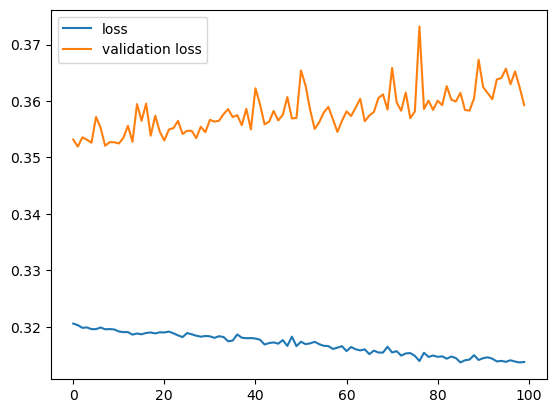

In [60]:
plt.plot(history.history['loss'],label="loss")
plt.plot(history.history['val_loss'],label="validation loss")
plt.legend()
plt.show()

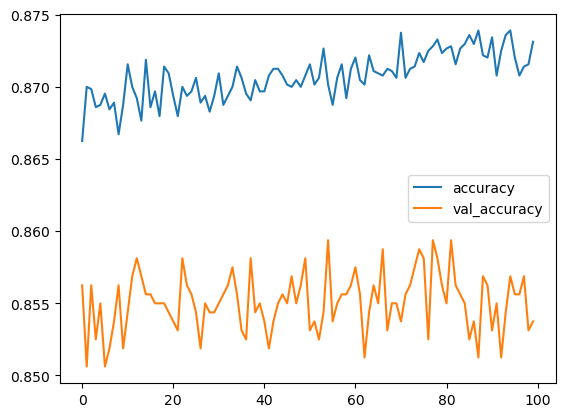

In [61]:
plt.plot(history.history['accuracy'],label="accuracy")
plt.plot(history.history['val_accuracy'],label="val_accuracy")
plt.legend()
plt.show()

In [53]:
model.layers[2].get_weights()

[array([[-0.48806274],
        [-1.0986432 ],
        [-0.29282755],
        [-0.7882307 ],
        [-0.4604638 ],
        [ 1.572566  ],
        [ 0.30453372],
        [ 1.2112182 ],
        [-0.7459407 ],
        [-0.32449865]], dtype=float32),
 array([-0.1753231], dtype=float32)]

In [41]:
y_log = model.predict(X_test_scaled)

63/63 [==============================] - 0s 1ms/step


In [42]:
y_pred = np.where(y_log>0.5, 1, 0)

In [43]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7945